In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import matplotlib as mpl
import sys
sys.path.append("..")
from exotop.model_1D import the_results as plottop
from exotop.model_1D import inputs as ins
from exotop.model_1D import parameters as p

# set paths
# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = '../latex/report-firstyr/figs/'
fig_format = '.png'
benchmark_path = '../benchmarks/'

# set mpl display parameters
mpl.rcParams['axes.linewidth'] = 2  # set the value globally - for poster
rc('font',**{'family':'serif','serif':['Times New Roman']})  # latex font for matplotlib CMU Serif Roman
# rc('font',**{'family':'monospace','monospace':['Ubuntu Mono']})  # for computery poster 
rc('text', usetex=True)  # turn on for latexy font
mpl.font_manager._rebuild()
plt.style.use('dark_background')

varying age
varying mass
varying CMF
varying H0
varying age
varying mass


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()
../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


varying CMF


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


varying H0


../exotop/model_1D/the_results.py:604: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


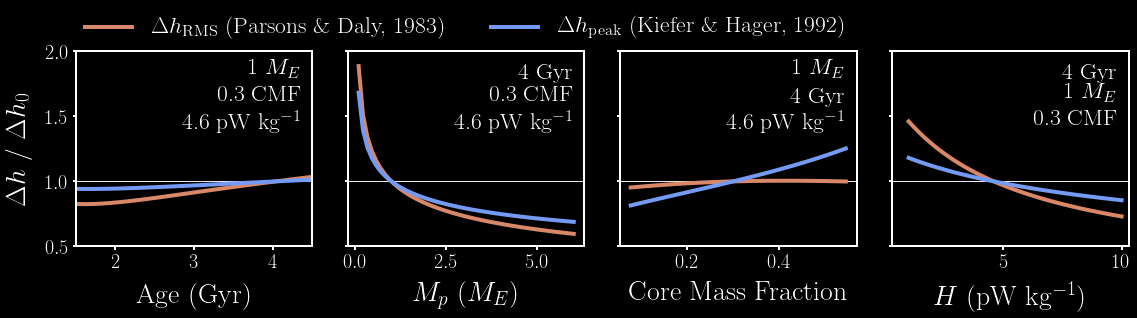

In [2]:
fig, axes=plottop.plot_h_relative_multi(age=4, alpha=1, wspace=0.15, legsize=23.5, ticksize=20, labelsize=28, 
                                        ymin=0.5, ymax=2, lw=4, #legtitle=r'\textbf{\textit{Model}}', 
                                        labelpad=10, legendtop=True, tickwidth=2,
                                        save=False, fname='relative_h_poster', fig_path=fig_path,
                                        visc_type='KW',
                                        models=['dyn_top_rms_isoviscous','dyn_top_KH'],
                                        labels=['$\Delta h_{\mathrm{RMS}}$ (Parsons \& Daly, 1983)',
                                                '$\Delta h_{\mathrm{peak}}$ (Kiefer \& Hager, 1992)'],
                                        x_vars=['age', 'M_p', 'CMF', 'H0'],
                                        c=['#d88868','#749af3'])

In [ ]:
fig, axes = plottop.plot_ocean_capacity_relative(n_stats=100, legsize=23.5, ticksize=20, labelsize=28, 
                                                 name_rms='dyn_top_rms_isoviscous',
                                                 wspace=0.15, titlesize=32,
                                                 fig_path=fig_path, save=False,
                                                 defaults='Venusbaseline', 
                                                 title='Ocean volume to submerge land',
                                                 spectrum_fpath=benchmark_path+'wei_Venus/',
                                                 spectrum_fname='model_power_m2_b.csv',
                                                 c='#81f79f', alpha=1, lw=4, ymin=0.3, ymax=1.8, labelpad=10,
                                                 set_ylim=True,
                                                 fname='ocean-vol',)

In [55]:
# ocean volume - as baseline planet use Huang Venus case 15
import pyshtools


def oceans_plot(n_stats=1000, wspace=0.5, fig_path='figs/', snap=4.5, legsize=16, fname='ocean_vol',
                ftype='pdf', titlesize=24, savefig=False,
                **plot_kwargs):

    ident = 'Venusbaseline'
    pl0 = pltt.build_planet(ident='Venusbaseline', run_args=None, 
                       update_args={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},)
    
    
    pl_list = pltt.bulk_planets(N=20, name='M_p', mini=0.01*p.M_E, maxi=6*p.M_E, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)
    d_ocean_Earth = 3.7e3
    phi0 = load_spectrum(fpath = 'benchmarks/wei_Venus/',fname = 'model_power_m2_b.csv')
    h_peak0 = peak_from_spectrum(phi0, n=n_stats)
    V_ocean0 = ocean_vol(h_peak0)
    pl0.max_ocean = V_ocean0
    print('V_ocean0 =',V_ocean0)
    print('CMF_0', pl0.CMF)
    print('R_p0', pl0.R_p)
    print('M_p0', pl0.M_p)

    for pl in pl_list:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, axes = plt.subplots(1, 4, figsize=(12, 4))

    # mass variation
    fig, ax = pltt.plot_vs_x(set_xlim=False,fig=fig, axes=axes[1],
                          lplanets=pl_list, ncol=1, ylabel=False, 
                          xname={'M_p':(r'$M_p$ ($M_{\mathrm{Ve}}$)', 4.867e24**-1)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap, **plot_kwargs)


    ax.axhline(y=1, lw=1, c='w', alpha=0.7)
    ax.text(0.95, 0.05,str(snap)+' Gyr \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)
    
    # how does ocean volume scale assuming constant mass fraction?
    rho_w = 1000
    X = rho_w*V_ocean0/pl0.M_p # mass fraction of water
    M_p_list = np.linspace(0.01*p.M_E, 6*p.M_E)
    ax.plot(M_p_list/4.867e24, M_p_list/pl0.M_p, c='#749af3', alpha=1, lw=4, zorder=0,
            label='Relative water budget')


    
    
    

    
    
    # H variation
    planets_H0 = pltt.bulk_planets(N=20, name='H_0', mini=1e-12, maxi=10e-12, like=ident, 
                           update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                           t_eval=pl0.t, random=False)

    for pl in planets_H0:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO

    fig, ax = pltt.plot_vs_x(#xmin=0.3, xmax=10.3, set_xlim=True,
                          lplanets=planets_H0, xname={'H_0':('$H_f$ (pW kg$^{-1}$)', 1e12)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap, ylabel=False, 
                          fig=fig, axes=axes[3], **plot_kwargs)

    ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)
    ax.text(0.95, 0.05, str(snap)+' Gyr \n 0.3 CMF \n'+'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{\mathrm{Ve}}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)


    
    
        # CMF variation
    planets_CMF = pltt.bulk_planets(N=20, name='CMF', mini=0.07829, maxi=0.544,  like=ident, 
                                    update_kwargs={'k_m':3.206, 'alpha_m':2e-5, 'T_s':730},
                                t_eval=pl0.t, random=False)
    for pl in planets_CMF:
        phi = scale_spectrum(phi0, pl, pl0)
        h_peak = peak_from_spectrum(phi, n=n_stats)
    #     print('h_peak', h_peak)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        pl.max_ocean = answer # in EO
    fig, ax = pltt.plot_vs_x(
                          lplanets=planets_CMF, xname={'CMF':('Core Mass Fraction',1)}, 
                          ynames={'max_ocean':(r'$V_{\mathrm{max}}/V_{\mathrm{max, Ve}}$', V_ocean0**-1)}, 
                          snap=snap,
                          plots_save=False, fig=fig, axes=axes[2], ylabel=False, **plot_kwargs)
    ax.axhline(y=1, lw=1, c='w', alpha=0.7, zorder=0)

    ax.text(0.95, 0.05,'{:1.0f}'.format(pl0.M_p/p.M_E)+' $M_{\mathrm{Ve}}$ \n'+str(snap)+' Gyr \n 4.6 pW kg$^{-1}$', fontsize=legsize,
             horizontalalignment='right',
             verticalalignment='bottom',
             transform = ax.transAxes)
    
    
    
    
    # age variation

    pl = pl_list[3]
    pl0 = tp.TerrestrialPlanet(d_m=pl.d_m[-1], T_m=pl.T_m[-1], Ra_i=pl.Ra_i[-1])
    times = np.linspace(0.1, 4.5, num=20)
    ocean = []
    for snap in times:
        phi = scale_spectrum(phi0, pl, pl0, snap=snap)
        h_peak = peak_from_spectrum(phi, n=n_stats)
        answer = ocean_vol(h_peak, R_p=pl.R_p)
    #     print('ocean_vol', answer)
        ocean.append(answer) # in EO
    pl.max_ocean = np.array(ocean)
    pl.t = times
    fig, ax = pltt.plot_vs_x(set_xlim=True, xmin=1.5, xmax=4.5, 
                        fig=fig, axes=axes[0],
                          lplanets=pl, ncol=1,
                          xname={'t':(r'Age (Gyr)', 1)}, 
                          ynames={'max_ocean':(r'$V$ / $V_{0}$', pl.max_ocean[-1]**-1)}, **plot_kwargs)
    ax.axhline(y=1, lw=1, c='w', alpha=0.7)
    ax.text(0.95, 0.05,'{:1.0f}'.format(pl0.M_p/4.867e24)+' $M_{\mathrm{Ve}}$ \n 0.3 CMF \n 4.6 pW kg$^{-1}$', fontsize=legsize,
         horizontalalignment='right',
         verticalalignment='bottom',
         transform = ax.transAxes)

    
    # title and legend
    legend=axes[1].legend(frameon=False, fontsize=legsize,  
                 borderaxespad=0, #mode="expand", 
                 loc='lower left', bbox_to_anchor= (1.6, 1.01), ncol=1)
    fig.suptitle('Ocean volume to submerge land', fontsize=titlesize, y=1.1, x=0.365)

    
    plt.subplots_adjust(wspace=wspace)
    for ax in axes:
        ax.xaxis.set_tick_params(width=2)
        ax.yaxis.set_tick_params(width=2)
    if savefig:
        plt.savefig(fig_path+fname+'.'+ftype, bbox_inches='tight', rasterized=True, dpi=600)
    return fig, axes
     


V_ocean0 = 1.0794170548390973e+18
CMF_0 0.3
R_p0 6070455.468598362
M_p0 4.867e+24


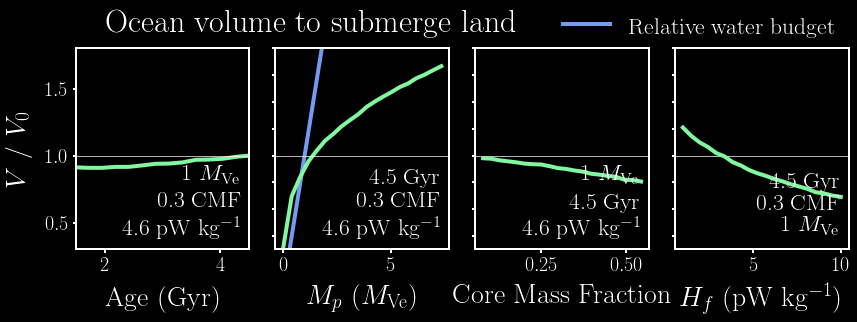

In [56]:

fig, ax = oceans_plot(n_stats=1000, legsize=23.5, ticksize=20, labelsize=28, wspace=0.15, titlesize=32,
            fig_path=fig_path, savefig=False,
            c='#81f79f', alpha=1, lw=4, ymin=0.3, ymax=1.8, labelpad=10, set_ylim=True,
           fname='ocean-vol-poster', ftype='png')